In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore') 
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [167]:
data = pd.read_csv(r'C:\Users\Sai Sreenivas\Machine Learning Projects\Linear Regression\Untitled Folder\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [168]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [169]:
data.shape

(246, 14)

In [170]:
data.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [171]:
data.loc[:122,'Region']=0
data.loc[122:, 'Region']=1
data.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [173]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,246,33,23,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,245,5,08,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,245,2,2012,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,245,20,35,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,245,63,55,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,245,19,14,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,245,40,0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,245,174,88.9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,245,167,7.9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,245,199,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [175]:
data.columns=[cols.strip() for cols in data.columns]
data.columns
        


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [176]:
data=data.astype(str)

In [177]:
### somes values in colums also have space
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    data[feature]= data[feature].str.replace(" ","")


In [178]:

### index no 165 for feature name FWI has value fire
data[data['FWI']== 'fire'].index

Int64Index([167], dtype='int64')

In [179]:

data.loc[165,'FWI']=' 0.1'

In [180]:
data[data['Classes']== 'nan'].index
data.loc[165,'Classes']='fire'

In [181]:
# encoding features 
data['Classes']  = data['Classes'].str.replace('notfire','0')
data['Classes'] =data['Classes'].str.replace('fire','1')

In [182]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [183]:
data['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 246, dtype: object

In [184]:
data.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [192]:
data['day']=data['day'].astype('int')

ValueError: invalid literal for int() with base 10: 'Sidi-Bel Abbes Region Dataset'

In [193]:

# data.dtypes

In [194]:
data.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [195]:
datatype_converts={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
 'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64',
 'Classes':'int64', 'Region':'float64'}
data=data.astype(datatype_converts) 

ValueError: invalid literal for int() with base 10: 'Sidi-Bel Abbes Region Dataset'

In [196]:
data['month']=data['month'].astype('int64')

ValueError: invalid literal for int() with base 10: 'nan'

In [197]:
data['year']=data['year'].astype('int64')

ValueError: invalid literal for int() with base 10: 'nan'

In [198]:
data['Temperature']=data['Temperature'].astype('int64')

ValueError: invalid literal for int() with base 10: 'nan'

In [199]:
data['RH']=data['RH'].astype('int64')

ValueError: invalid literal for int() with base 10: 'nan'

In [200]:
data['Ws']=data['Ws'].astype('int64')

ValueError: invalid literal for int() with base 10: 'nan'

In [201]:
data['Rain']=data['Rain'].astype('float64')

ValueError: could not convert string to float: 'Rain'

In [202]:
data['FFMC']=data['FFMC'].astype('float64')

ValueError: could not convert string to float: 'FFMC'

In [203]:
data['DMC']=data['DMC'].astype('float64')

ValueError: could not convert string to float: 'DMC'

In [204]:
data['DC']=data['DC'].astype('float64')

ValueError: could not convert string to float: 'DC'

In [205]:

data['ISI']=data['ISI'].astype('float64')

ValueError: could not convert string to float: 'ISI'

In [206]:
data['BUI']=data['BUI'].astype('float64')

ValueError: could not convert string to float: 'BUI'

In [207]:
data['FWI']=data['FWI'].str.replace('fire','0.1')

In [208]:
data['FWI'] =data['FWI'].astype('float64')

ValueError: could not convert string to float: 'FWI'

In [209]:
data['Classes']=data['Classes'].str.replace('nan','1')

In [210]:
data['Classes'].unique()

array(['0', '1', 'Classes'], dtype=object)

In [211]:
data['Classes']=data['Classes'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Classes'

In [212]:
data['Region']=data['Region'].astype('float64')

In [213]:
data.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [214]:
data.shape

(246, 15)

###  Checking the null values in data set

In [215]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [216]:
# categorical features
categorical_feature=[feature for feature in data.columns if data[feature].dtypes=='O']
#getting to know different categories in cateogrical features with its count.
for feature in categorical_feature:
    print(data.groupby(feature)['Region'].value_counts())

day                            Region
01                             0.0       4
                               1.0       4
02                             0.0       4
                               1.0       4
03                             0.0       4
                                        ..
30                             1.0       4
31                             0.0       2
                               1.0       2
Sidi-Bel Abbes Region Dataset  1.0       1
day                            1.0       1
Name: Region, Length: 64, dtype: int64
month  Region
06     0.0       30
       1.0       30
07     0.0       31
       1.0       31
08     0.0       31
       1.0       31
09     0.0       30
       1.0       30
month  1.0        1
nan    1.0        1
Name: Region, dtype: int64
year  Region
2012  0.0       122
      1.0       122
nan   1.0         1
year  1.0         1
Name: Region, dtype: int64
Temperature  Region
22           0.0        2
24           1.0        2
             0.0 

In [217]:
sns.countplot(data=data, x='Classes', hue='Region').,.,,,

SyntaxError: invalid syntax (<ipython-input-217-6aab3825b39b>, line 1)

In [218]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes !='O']
print(numerical_features)

['Region']


In [219]:
data[numerical_features].nunique()

Region    2
dtype: int64

###  Segerate the fetaures

In [117]:
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<35]
discrete_features

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

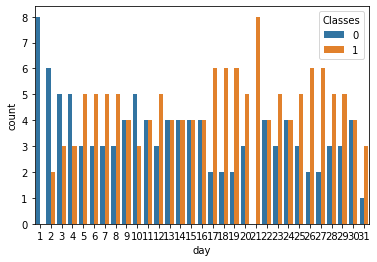

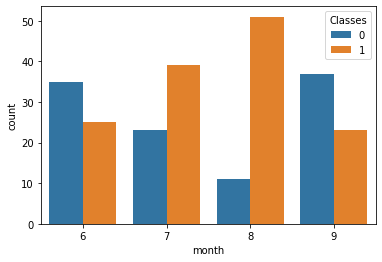

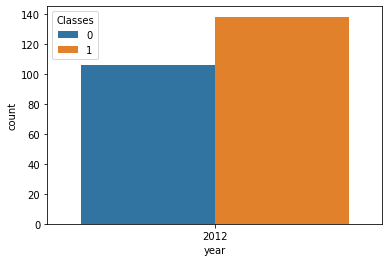

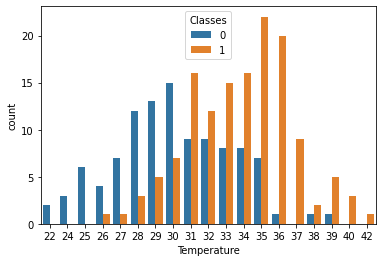

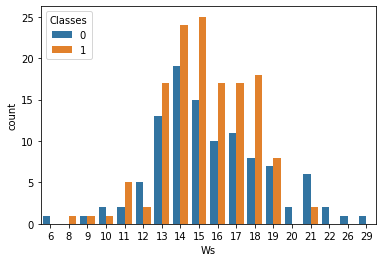

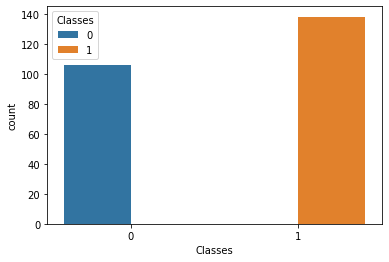

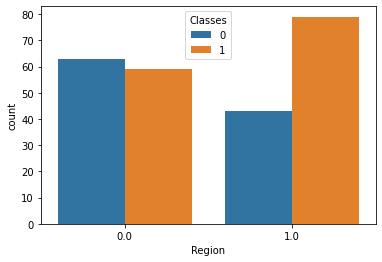

In [118]:
for feature in discrete_features:
    sns.countplot(data=data, x=feature, hue='Classes')
    plt.show()

In [119]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


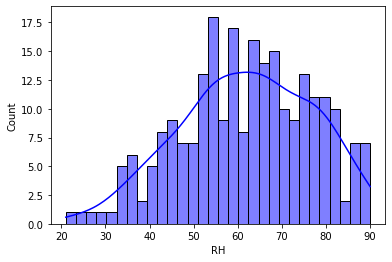

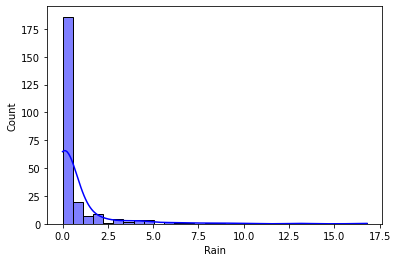

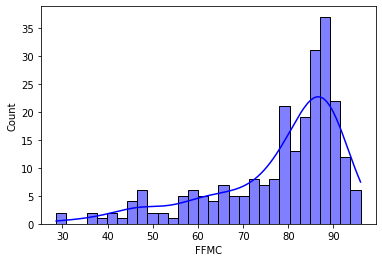

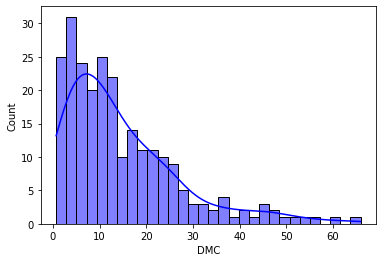

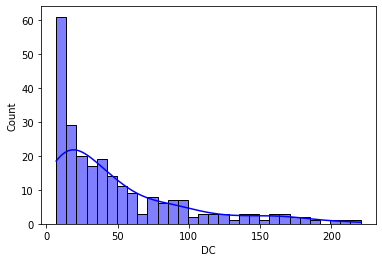

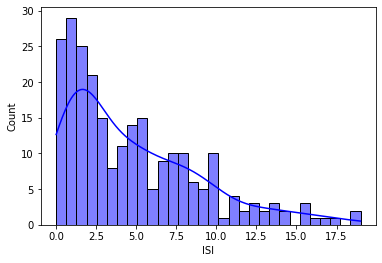

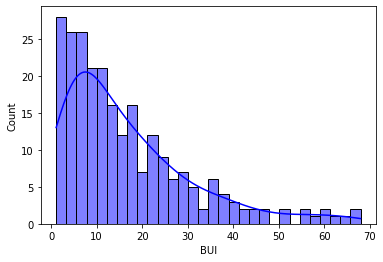

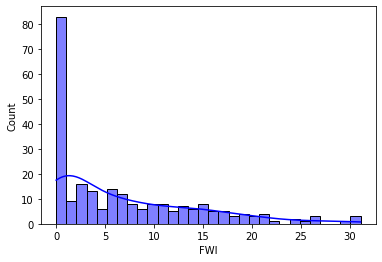

In [121]:
for feature in continuous_features:
    sns.histplot(data=data, x=feature,kde=True, bins=30, color='blue')
    plt.show();

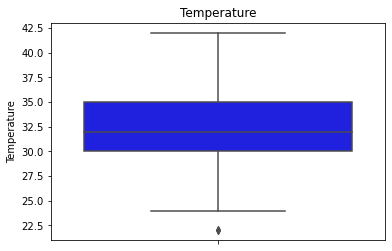

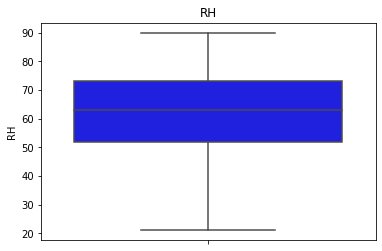

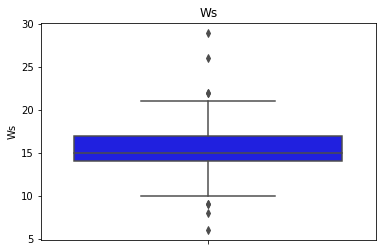

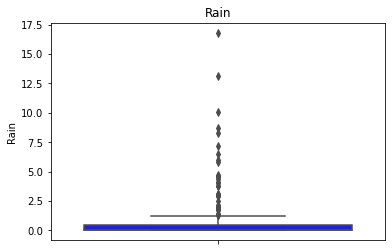

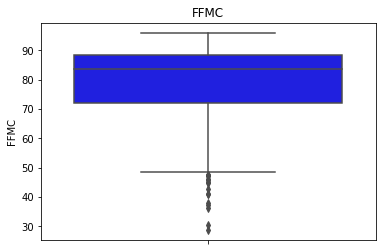

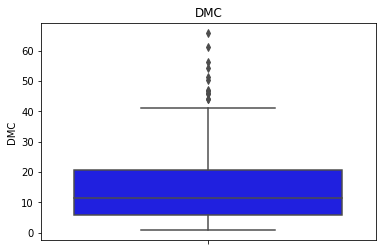

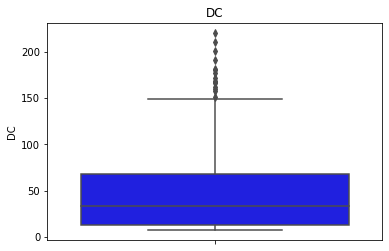

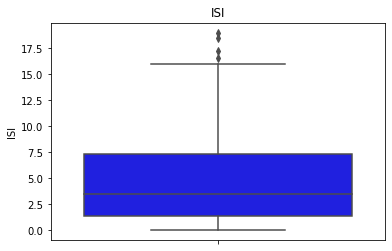

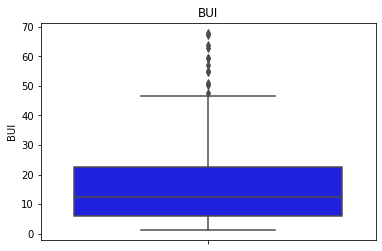

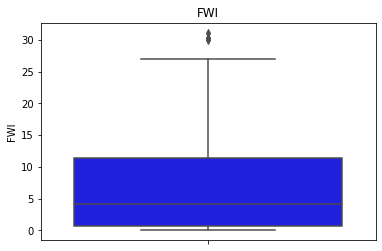

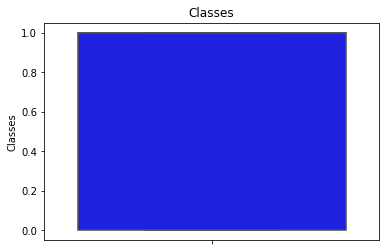

In [125]:
for feature in [feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]:
    sns.boxplot(data=data, y= feature, color='b')
    plt.title(feature)
    plt.show();

In [127]:

data= round(data[[feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.55,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.56,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.68,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.90,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.55,-0.56,0.03,-0.32,0.68,0.87,0.74,0.90,0.86,1.00,0.71


<AxesSubplot:>

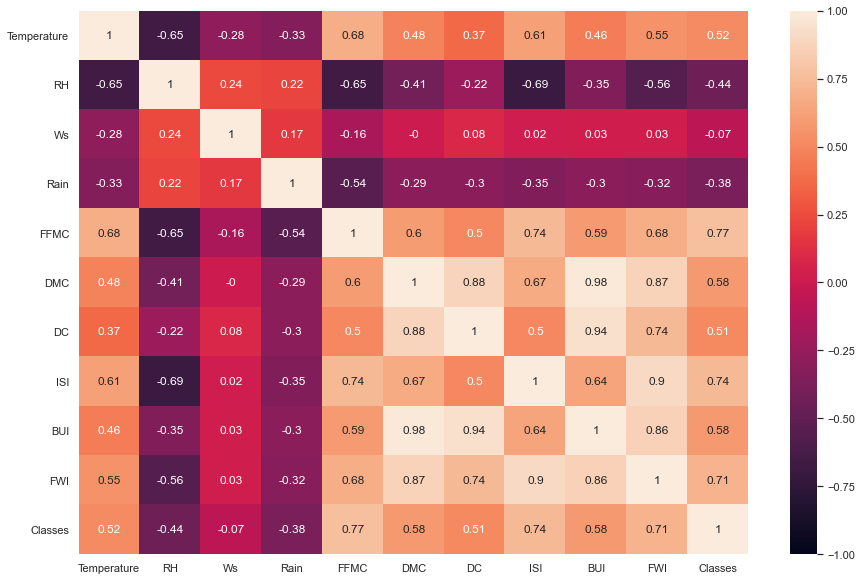

In [128]:

### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True, vmin=-1, vmax=1)

In [145]:
#sns.scatterplot(data=data, x='day', y='Temperature', hue='Classes')
#sns.countplot(data =data, x='day')

In [146]:
#sns.scatterplot(data=data, x='month', y='Temperature', hue='Classes' )

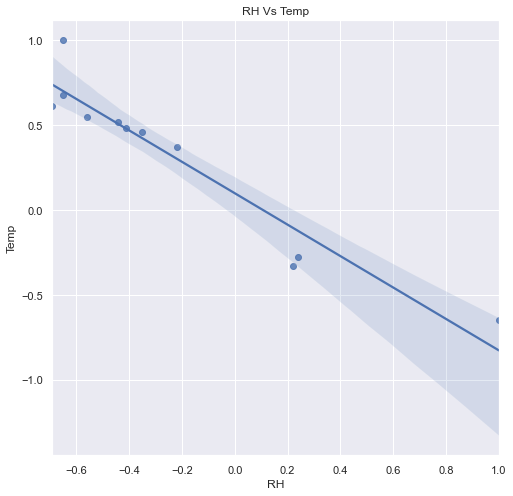

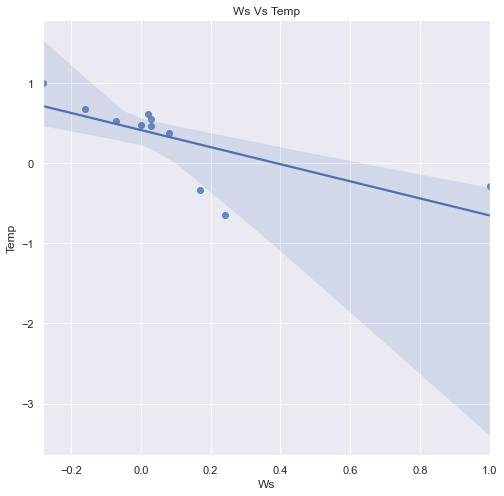

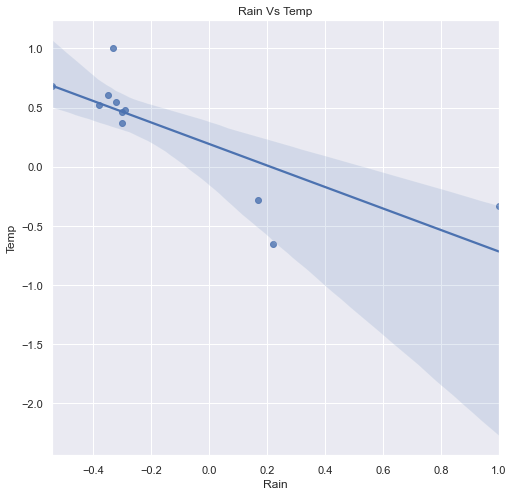

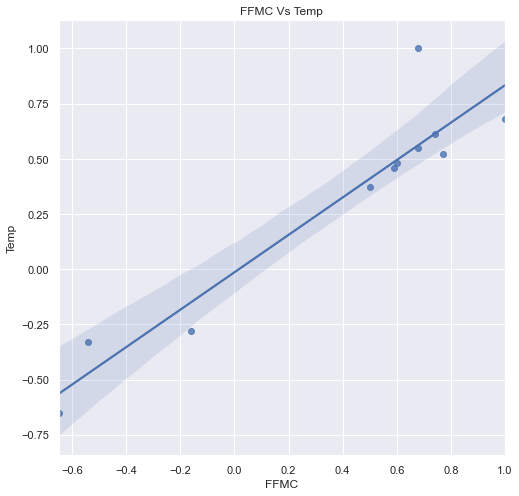

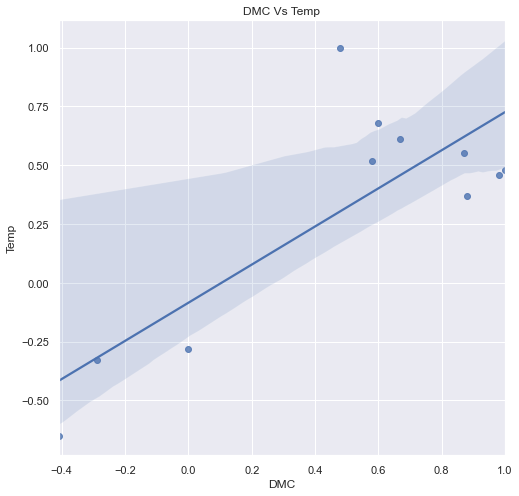

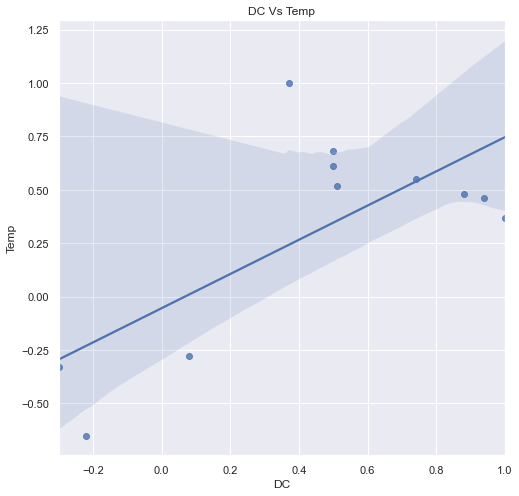

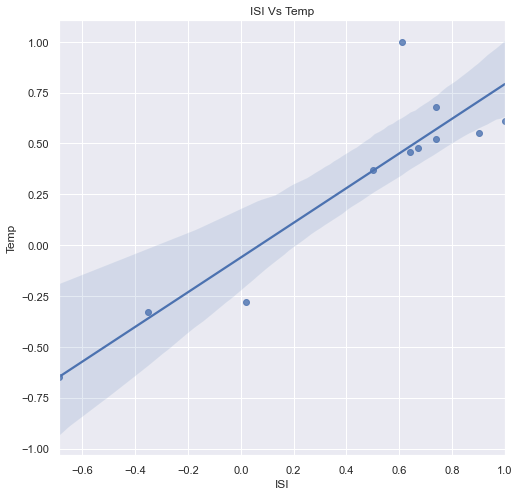

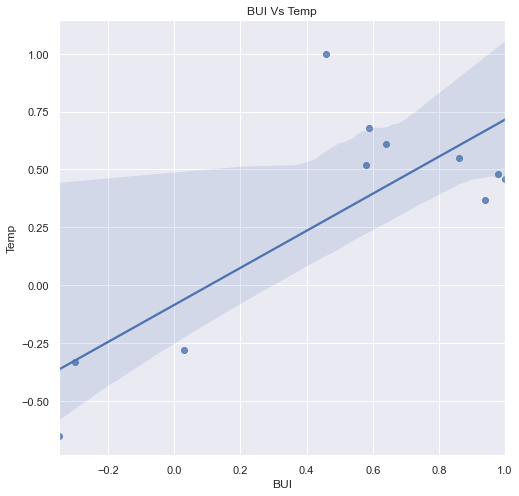

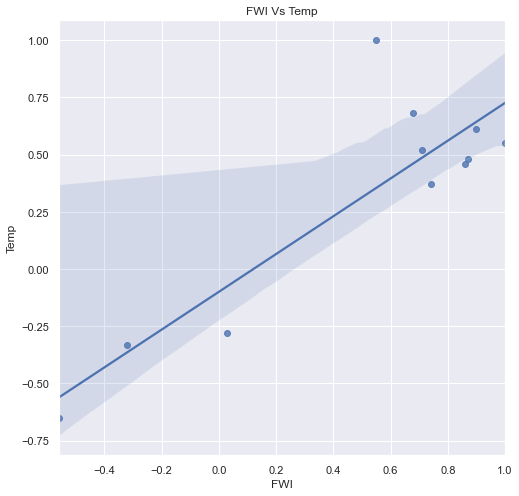

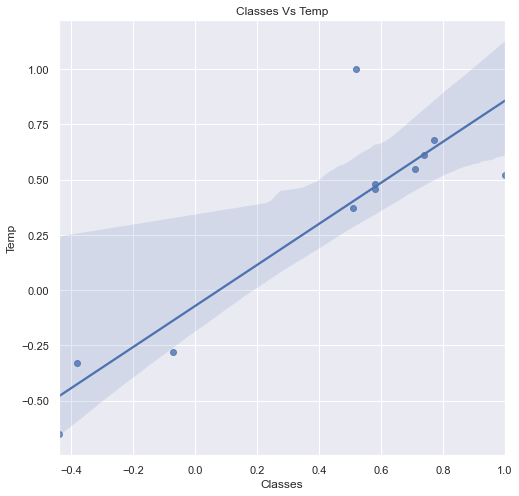

In [151]:
for feature in [feature for feature in data.columns if feature not in ['Temperature']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=data[feature], y=data['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temp")
    plt.title("{} Vs Temp".format(feature))
    plt.show();

In [164]:
data.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Temp'],
      dtype='object')